In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/WikiQA.tsv', sep="\t")
df.head(20)

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-0,African immigration to the United States refer...,0
1,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-1,The term African in the scope of this article ...,0
2,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-2,From the Immigration and Nationality Act of 19...,0
3,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-3,African immigrants in the United States come f...,0
4,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-4,"They include people from different national, l...",0
5,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-5,"As such, African immigrants are to be distingu...",1
6,Q1,how are glacier caves formed?,D1,Glacier cave,D1-0,A partly submerged glacier cave on Perito More...,0
7,Q1,how are glacier caves formed?,D1,Glacier cave,D1-1,The ice facade is approximately 60 m high,0
8,Q1,how are glacier caves formed?,D1,Glacier cave,D1-2,Ice formations in the Titlis glacier cave,0
9,Q1,how are glacier caves formed?,D1,Glacier cave,D1-3,A glacier cave is a cave formed within the ice...,1


In [3]:
def select_doc_titles(df, titles):
    '''
    Parameters:
        df - pandas dataframe from which we are selecting the columns from
        titles - an np array of document titles to select
    Returns:
        Pandas Dataframe of only desired document titles
    '''
    series = []
    for i in range(0, len(titles)):
        series.append(df[df['DocumentTitle'] == titles[i]].reset_index())

    return pd.concat(series).reset_index()

In [4]:
titles = ['Pancreatic cancer',
          'Pharmaceutical industry',
          'Variable universal life insurance',
          'Sebaceous cyst',
          'Chronic obstructive pulmonary disease',
          'Brain tumor',
          'Cardiovascular disease',
          'Plateletpheresis']

In [11]:
sample_df = select_doc_titles(df, titles)

In [12]:
sample_df.head()

,level_0,index,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,0,1469,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-0,Pancreatic cancer is a malignant neoplasm orig...,0
1,1,1470,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-1,"The most common type of pancreatic cancer , ac...",0
2,2,1471,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-2,"A minority arise from islet cells , and are cl...",0
3,3,1472,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-3,The signs and symptoms that eventually lead to...,0
4,4,1473,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-4,Pancreatic cancer is the fourth most common ca...,0


In [13]:
sample_df = sample_df.drop(columns=['level_0', 'index', 'QuestionID', 'DocumentID', 'SentenceID'])

In [14]:
sample_df.head()

,Question,DocumentTitle,Sentence,Label
0,how does one get pancreatic cancer,Pancreatic cancer,Pancreatic cancer is a malignant neoplasm orig...,0
1,how does one get pancreatic cancer,Pancreatic cancer,"The most common type of pancreatic cancer , ac...",0
2,how does one get pancreatic cancer,Pancreatic cancer,"A minority arise from islet cells , and are cl...",0
3,how does one get pancreatic cancer,Pancreatic cancer,The signs and symptoms that eventually lead to...,0
4,how does one get pancreatic cancer,Pancreatic cancer,Pancreatic cancer is the fourth most common ca...,0


In [16]:
val_count = sample_df['DocumentTitle'].value_counts()

In [19]:
print("Number of answers for each Question Type:\n{}".format(val_count))

Number of answers for each Question Type:
Variable universal life insurance        14
Brain tumor                              12
Chronic obstructive pulmonary disease    11
Cardiovascular disease                    8
Pancreatic cancer                         7
Sebaceous cyst                            6
Pharmaceutical industry                   5
Plateletpheresis                          4
Name: DocumentTitle, dtype: int64


In [25]:
print(val_count[0])
print(val_count[1])
print(val_count.index)

14
12
Index(['Variable universal life insurance', 'Brain tumor',
       'Chronic obstructive pulmonary disease', 'Cardiovascular disease',
       'Pancreatic cancer', 'Sebaceous cyst', 'Pharmaceutical industry',
       'Plateletpheresis'],
      dtype='object')


([<matplotlib.axis.XTick at 0x7fa1cd5ab9e8>,
 <a list of 8 Text xticklabel objects>)

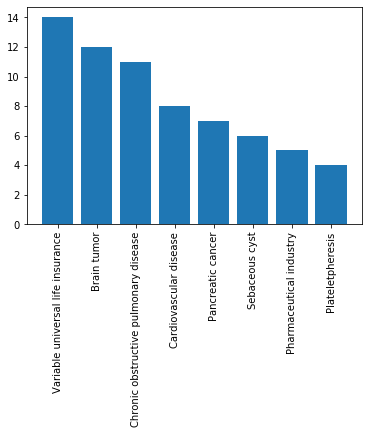

In [41]:
ax, fig = plt.subplots(1,1)
plt.bar(range(len(val_count.index)), height=val_count)
plt.xticks(range(len(val_count.index)), val_count.index, rotation='vertical')